# Basic flow for Machine Learning:

##### 1) Loading the data
##### 2) Preprocessing the data
##### 3) Train & Test data split
##### 4) Creating your model using supervised 
##### 5) Fit the model with train set 
##### 6) Predicting it with test set and finally 
##### 7) Evaluate the model’s performance.

### Loading The Data

#### Your data needs to be numeric and stored as NumPy arrays or SciPy sparse matrices. Other types that are convertible to numeric arrays, such as Pandas DataFrame, are also acceptable.

In [ ]:
import numpy as np 
import pandas as pd

titanic = pd.read_csv("https://raw.githubusercontent.com/vamsivarma/datasets/master/data_science/pandas/titanic.csv")

titanic.columns

#X = np.random.random((10,5)) 
#y = np.array(['M','M','F','F','M','F','M','M','F','F','F'])

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### Preprocessing The Data

#### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler().fit(X_train) 
standardized_X = scaler.transform(X_train) 
standardized_X_test = scaler.transform(X_test)

ValueError: ignored

#### Normalization

In [ ]:
from sklearn.preprocessing import Normalizer 
scaler = Normalizer().fit(X_train) 
normalized_X = scaler.transform(X_train) 
normalized_X_test = scaler.transform(X_test)

#### Binarization

In [ ]:
from sklearn.preprocessing import Binarizer 

binarizer = Binarizer(threshold=0.0).fit(X) 
binary_X = binarizer.transform(X)

#### Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
y = enc.fit_transform(y)

#### Imputing missing values

In [ ]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=0, strategy='mean', axis=0)
imp.fit_transform(X_train)

#### Generating Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
oly.fit_transform(X)

### EDA

Check for null values in the dataset

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Drop the columns with more null values, example embarked has 688 null values which is not good for our machine learning modal so just drop it!

In [ ]:
titanic = titanic.dropna(subset=['embarked'])
titanic.drop('deck', axis=1, inplace=True)

In [ ]:
print(titanic.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


Handle null values in the age column and replace it with mean age 

In [ ]:
titanic['null_age'] = titanic['age'].isnull().astype(int)

def fill_nulls(row):
  if row['null_age'] == 1:
    if row['pclass'] == '1':
      return titanic[titanic['pclass'] == 1]['age'].mean()
    elif row['pclass'] == '2':
      return titanic[titanic['pclass'] == 2]['age'].mean()
    else: 
      return titanic[titanic['pclass'] == 3]['age'].mean()
  else:
    return titanic['age']

titanic['age'] = titanic.apply(fill_nulls, axis=1)

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
null_age       0
dtype: int64

Now our dataset is free from null values

The next step is to decide what features to use to predict ‘Survived’. I keep the feature selection simple. Realistically, this step should be long and meticulous. For now, I use the following features:

In [ ]:
features = ['age', 'sibsp', 'parch', 'fare', 'pclass', 'pclass', 'sex', 'embarked']

Now, let us encode all the categorical values in to numerical values for our ML algorithm

Pandas allows for a quick conversion from categorical to numeric columns with its get_dummies method. After this step, we have a clean dataset with strictly numerical columns that we can feed into machine learning models.


In [ ]:
titanic = pd.get_dummies(titanic, columns=['pclass', 'sex', 'embarked', 'embark_town', 'class', 'who', 'adult_male', 'alive', 'alone'], drop_first=True)

drop_first = True gets rid of collinearity in the predictor matrix

Now, lets check our dataframe

In [ ]:
titanic.head()

,survived,age,sibsp,parch,fare,null_age,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,embark_town_Queenstown,embark_town_Southampton,class_Second,class_Third,who_man,who_woman,adult_male_True,alive_yes,alone_True
0,0,22.0,1,0,7.2500,0,0,1,1,0,1,0,1,0,1,1,0,1,0,0
1,1,22.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,22.0,0,0,7.9250,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1
3,1,22.0,1,0,53.1000,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0
4,0,22.0,0,0,8.0500,0,0,1,1,0,1,0,1,0,1,1,0,1,0,1


### Training and test data split

In [ ]:
from sklearn.model_selection import train_test_split
X = titanic.drop('survived', axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train)

          age  sibsp  parch  ...  adult_male_True  alive_yes  alone_True
825  25.14062      0      0  ...                1          0           1
76   25.14062      0      0  ...                1          0           1
441  22.00000      0      0  ...                1          0           1
878  25.14062      0      0  ...                1          0           1
818  22.00000      0      0  ...                1          0           1
..        ...    ...    ...  ...              ...        ...         ...
647  22.00000      0      0  ...                1          1           1
781  22.00000      1      0  ...                0          1           0
261  22.00000      4      2  ...                0          1           0
77   25.14062      0      0  ...                1          0           1
442  22.00000      1      0  ...                1          0           0

[711 rows x 19 columns]


### Create Your Model

#### Supervised Learning Estimators

##### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

##### Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')

##### KNN

In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

### Model Fitting

#### Supervised learning

In [ ]:
# Linear regression
lr.fit(X, y)

# K Nearest neighbours
knn.fit(X_train, y_train)

# Support Vector Machines (SVM)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Prediction

#### Supervised Estimators


In [ ]:
y_pred = svc.predict(np.random.random((2,19)))
y_pred = lr.predict(X_test)
y_pred = knn.predict_proba(X_test)

### Evaluate Your Model’s Performance

#### Classification Metrics

##### Accuracy Score

In [ ]:
knn.score(X_test, y_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5561797752808989

##### Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77       108
           1       0.50      0.01      0.03        70
           2       0.00      0.00      0.00         0

    accuracy                           0.56       178
   macro avg       0.39      0.31      0.27       178
weighted avg       0.60      0.56      0.48       178



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[98  1  9]
 [48  1 21]
 [ 0  0  0]]


#### Regression Metrics

##### Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.4943820224719101

##### Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.5955056179775281

##### R2 Score

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.4957671957671965

#### Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X_train, y_train, cv=4))
print(cross_val_score(lr, X, y, cv=2))

[0.81460674 0.83707865 0.87078652 0.84180791]
[1. 1.]


# Hello world project for Hand written digit classification from scikit-learn preloaded digits datasets

#### Loading an example dataset

##### scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the boston house prices dataset for regression.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris() 
digits = datasets.load_digits()

#### A dataset is a dictionary-like object that holds all the data and some metadata about the data. This data is stored in the **.data** member, which is a **n_samples**, **n_features** array. In the case of supervised problem, one or more response variables are stored in the **.target** member

#### All the sample datasets provided by scikit can be found [here](https://scikit-learn.org/stable/datasets/index.html#datasets)

In [ ]:
# Checking the dataset
print(digits.data)

# Find the dataset shape
print(digits.data.shape)

# Print the target variable
print(digits.target)

# Print the target variable shape
print(digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]
(1797,)


#### That means we have total of 1797 observations in our digits dataset and there are 64 features in our dataset

#### Other operations for digits dataset

In [ ]:
print(digits.images.shape)

print(digits.images[0])

print(digits.images[0].shape)

(1797, 8, 8)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)


#### Learning and predicting

##### In the case of the digits dataset, the task is to predict, given an image, which digit it represents. We are given samples of each of the 10 possible classes (the digits zero through nine) on which we fit an estimator to be able to predict the classes to which unseen samples belong.

##### In scikit-learn, an estimator for classification is a Python object that implements the methods fit(X, y) and predict(T).

##### An example of an estimator is the class sklearn.svm.SVC, which implements support vector classification. The estimator’s constructor takes as arguments the model’s parameters.

##### For now, we will consider the estimator as a black box:

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)

#### Choosing the parameters of the model

#### In this example, we set the value of gamma manually. To find good values for these parameters, we can use tools such as grid search and cross validation.

#### Training

In [ ]:
clf.fit(digits.data[:-1], digits.target[:-1])
#SVC(C=100.0, gamma=0.001)

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Prediction

In [ ]:
clf.predict([digits.data[700]])
#print(digits.data[-1:])
#print(list(digits.data[100]))

array([2])

#### Model persistence

##### It is possible to save a model in scikit-learn by using Python’s built-in persistence model, pickle:

In [ ]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
X, y = datasets.load_iris(return_X_y=True)
clf.fit(X, y)

# Persisting the model using pickle
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

##### In the specific case of scikit-learn, it may be more interesting to use joblib’s replacement for pickle (joblib.dump & joblib.load), which is more efficient on big data but it can only pickle to the disk and not to a string:

In [ ]:
from joblib import dump, load
dump(clf, 'filename.joblib')

##### Later, you can reload the pickled model (possibly in another Python process) with:

In [ ]:
clf = load('filename.joblib') 

#### Full code

Automatically created module for IPython interactive environment
Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899

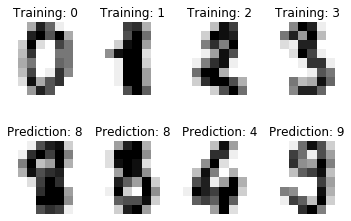

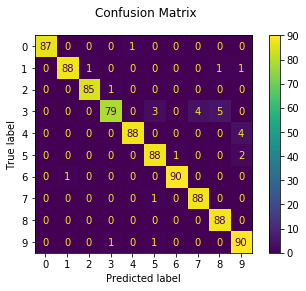

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

#### Useful articles 
https://towardsdatascience.com/hands-on-introduction-to-scikit-learn-sklearn-f3df652ff8f2

https://scikit-learn.org/stable/tutorial/basic/tutorial.html

https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py

https://scikit-learn.org/stable/datasets/index.html

https://medium.com/@andrewadelson/testing-different-models-for-the-titanic-dataset-be5f725b7ec0

# Code Dump

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

# Load in our dataset
iris_data = load_iris()

# Initialize our decision tree object
classification_tree = tree.DecisionTreeClassifier()

# Train our decision tree (tree induction + pruning)
classification_tree = classification_tree.fit(iris_data.data, iris_data.target)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(classification_tree, out_file=None, 
                     feature_names=iris_data.feature_names,  
                     class_names=iris_data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris") 

'iris.pdf'